In [41]:
import sqlite3
import numpy as np
import pandas as pd
import pyspark as ps
import matplotlib as plt
import seaborn as sns

Dataset is available here: https://www.kaggle.com/datasets/kjanjua/jurassic-park-the-exhaustive-dinosaur-dataset

In [42]:
#create dataframe of info and check that it loads correctly

df = pd.read_csv('dinodata.csv')
df.head(5)

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...


In [43]:
#database metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      309 non-null    object
 1   diet      309 non-null    object
 2   period    309 non-null    object
 3   lived_in  308 non-null    object
 4   type      309 non-null    object
 5   length    291 non-null    object
 6   taxonomy  309 non-null    object
 7   named_by  309 non-null    object
 8   species   304 non-null    object
 9   link      309 non-null    object
dtypes: object(10)
memory usage: 24.3+ KB


In [44]:
#database stats
df.describe(include='all')
#df.describe()

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link
count,309,309,309,308,309,291,309,309,304,309
unique,309,5,154,32,7,73,102,277,272,309
top,aardonyx,herbivorous,Late Cretaceous 76-74 million years ago,USA,sauropod,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Marsh (1877),mongoliensis,https://www.nhm.ac.uk/discover/dino-directory/...
freq,1,185,14,77,69,21,11,4,7,1


In [45]:
#find null values
df.isnull().sum()

name         0
diet         0
period       0
lived_in     1
type         0
length      18
taxonomy     0
named_by     0
species      5
link         0
dtype: int64

In [46]:
#finding percentages of missing values

missing_count = df.isnull().sum() #sum of all missing values
value_count = df.isnull().count() #the count of attributes that have missing values
missing_percentage = round(missing_count / value_count * 100, 2) #rounds the math to two decimal points

#creating a dataframe of the missing values
missing_df = pd.DataFrame({'count':missing_count, 'percentage': missing_percentage})
print(missing_df) #prints new dataframe of missing values

          count  percentage
name          0        0.00
diet          0        0.00
period        0        0.00
lived_in      1        0.32
type          0        0.00
length       18        5.83
taxonomy      0        0.00
named_by      0        0.00
species       5        1.62
link          0        0.00


In [47]:
#can work with certain columns like diet, period (maybe), lived in (maybe), type, length: 3 to 5 columns
df = df.drop(['taxonomy','named_by','species','link'], axis=1)
df.head(5)

,name,diet,period,lived_in,type,length
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m


In [48]:
#will need to use label encoder to graph values
df['diet'].unique()

array(['herbivorous', 'carnivorous', 'omnivorous', 'unknown',
       'herbivorous/omnivorous'], dtype=object)

In [49]:
#sklearn has built in label encoder
import sklearn
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['diet'] = le.fit_transform(df['diet'])
df['diet'].unique()

array([1, 0, 3, 4, 2])

<Axes: title={'center': 'diet'}, ylabel='Frequency'>

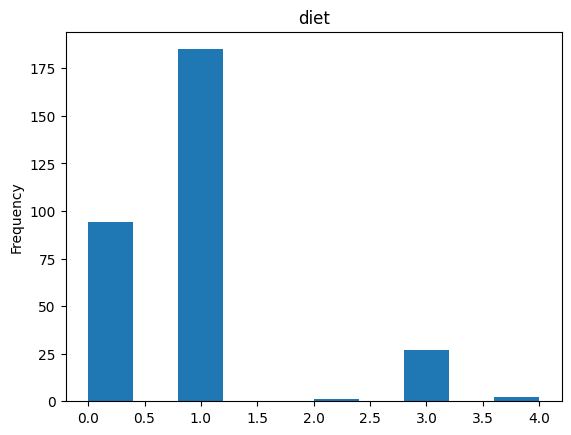

In [50]:
#try to bar chart total sum of each category
df["diet"].plot(kind='hist', title='diet')

In [51]:
#to print the row with a specific column value
df.loc[df['diet'] == 2]

,name,diet,period,lived_in,type,length
237,riojasaurus,2,Late Triassic 221-210 million years ago,Argentina,sauropod,5.15m


In [52]:
df.loc[df['diet'] == 4]

,name,diet,period,lived_in,type,length
182,mononykus,4,Late Cretaceous 81-68 million years ago,Mongolia,small theropod,1.0m
281,therizinosaurus,4,Late Cretaceous 85-70 million years ago,Mongolia,large theropod,NaN


In [53]:
# can drop the "2" and "4" labels since they hold little weight over the dataset
# sad because therizinosaurus is really cool
df = df.drop([237, 182, 281])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      306 non-null    object
 1   diet      306 non-null    int32 
 2   period    306 non-null    object
 3   lived_in  305 non-null    object
 4   type      306 non-null    object
 5   length    289 non-null    object
dtypes: int32(1), object(5)
memory usage: 15.5+ KB


In [54]:
#run label encoder again to easily get labels of 0,1 and 2 instead of 0, 1, and 3
#inverse_transform to get labels back if needed
df['diet'] = le.fit_transform(df['diet'])
df['diet'].unique()

array([1, 0, 2], dtype=int64)

In [55]:
df['type'].unique()

#one of the types is a length instead of a label
#example of data cleaning

array(['sauropod', 'large theropod', 'ceratopsian', 'euornithopod',
       'small theropod', 'armoured dinosaur', '1.0m'], dtype=object)

In [56]:
df.loc[df['type'] == '1.0m']

,name,diet,period,lived_in,type,length
155,lesothosaurus,1,Early Jurassic 213-200 million years ago,Lesotho,1.0m,NaN


In [57]:
#for larger sets, would automate filling in missing data
#this is a pretty easy fix though
#get row (55) and set length = 1.0m 
# then set type as max appearing UNLESS all types are equal and that would be random choice
df.loc[155, 'length'] = '1.0m'
df.loc[155]

name                                   lesothosaurus
diet                                               1
period      Early Jurassic 213-200 million years ago
lived_in                                     Lesotho
type                                            1.0m
length                                          1.0m
Name: 155, dtype: object

In [58]:
#find max appearing type in df['type']
df.mode()['type'][0]

'sauropod'

In [59]:
#example of max
df.loc[155, 'type'] = 'sauropod'
df.loc[155]

#now printing out all the types
print(df['type'].unique())

['sauropod' 'large theropod' 'ceratopsian' 'euornithopod' 'small theropod'
 'armoured dinosaur']


[4 3 1 2 5 0]


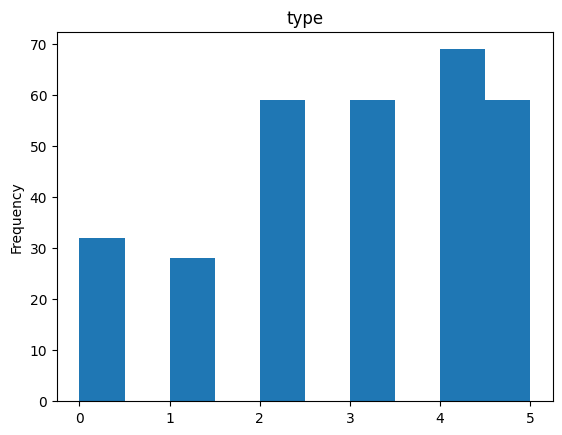

In [60]:
#can now easily encode type
df['type'] = le.fit_transform(df['type'])
df['type'].plot(kind='hist', title='type')
print(df['type'].unique())

Filling in Null Values in Length Column

 - going to experiment with inputting average length grouped by type
 - need to standardize length first by delimiting by m, makes two columns of 'length' and 'drop'
 - drop the null 'drop' column and create a 2nd dataframe copied from the first
 - find the index of the rows that have 'nan' for length
 - transform the datatype of the length values from str to float via casting
 - recreate df2 by grouping by type
 - running mean on each group to get a value to fill into df

In [61]:
# a lot of lengths are null (~6%)
# going to experiment with inputting average length by type
#need to standardize length first

#null string: pd.isna(df['column_name'])

In [62]:
#splititng the column length at delimiter m
df[['length', 'drop']] = df.length.apply( 
    lambda x: pd.Series(str(x).split("m")))

In [63]:
#dropping the 'drop' column
df = df.drop(['drop'], axis=1)
df2 = df

In [64]:
#print(df2[df2['length'] == "nan"].index)
df2.drop([90, 96, 99, 120, 140, 144, 152, 156, 191, 241, 252, 275, 287, 292, 302, 308])
#casts length to floats
df2['length'] = df['length'].astype(float)


#if df2['length'] == "nan":
    #drop row, first should be 90
#    index = df[df['length'] == "nan"].index
#    df2.drop([index])

In [65]:
#sort by type
df2 = df.groupby('type', dropna = True)
#prints first of each group
df2.first()

,name,diet,period,lived_in,length
type,,,,,
0,ankylosaurus,1,Late Cretaceous 74-67 million years ago,USA,7.0
1,achelousaurus,1,Late Cretaceous 83-70 million years ago,USA,6.0
2,agilisaurus,1,Late Jurassic 169-159 million years ago,China,1.5
3,abelisaurus,0,Late Cretaceous 74-70 million years ago,Argentina,9.0
4,aardonyx,1,Early Jurassic 199-189 million years ago,South Africa,8.0
5,alvarezsaurus,0,Late Cretaceous 89-85 million years ago,Argentina,2.0


In [66]:
#get average length by type
df2['length'].mean()

type
0     5.324138
1     4.170833
2     5.616667
3     7.548276
4    14.652239
5     1.946897
Name: length, dtype: float64

Now we have the average values of length by group type. We need to input these values for the "nan" length values for each type group in df. For example, df.loc[90, 'type'] = 3, so the value at row 90 column length would be 7.55 (rounded to two decimal places)

In [67]:
df.loc[90, 'type']

3

In [68]:
df.loc[90, 'length'] = 7.55

In [69]:
df.loc[90, 'length']

7.55

In [70]:
#df['length'] = df.groupby('type', sort=False)['length'].apply(lambda x: x.fillna(x.mean()))
#allegedly this will work but i couldnt get it to

In [71]:
#testing if numpy nan can be bool
type(np.isnan(df.loc[152, "length"]))

numpy.bool_

In [72]:
#inputting mean length values
print("rows to check: 96, 99, 120, 140, 144, 152, 191, 241, 252, 275, 287, 292, 302, 308")

for index in df.index:
    if np.isnan(df.loc[index, "length"]):
        if df.loc[index, 'type'] == 0:
            df.loc[index, 'length'] = 5.32
            print("My length is 5.32")
        elif df.loc[index, 'type'] == 1:
            df.loc[index, 'length'] = 4.17
            print("My length is 4.17")
        elif df.loc[index, 'type'] == 2:
            df.loc[index, 'length'] = 5.62
            print("My length is 5.62")
        elif df.loc[index, 'type'] == 3:
            df.loc[index, 'length'] = 7.55
            print("My length is 7.55")
        elif df.loc[index, 'type'] == 4:
            df.loc[index, 'length'] = 14.65
            print("My length is 14.65")
        elif df.loc[index, 'type'] == 5:
            df.loc[index, 'length'] = 1.95
            print("My length is 1.95")
        else:
            print("Could not find that combination in the data. Try checking aforementioned rows")
    else:
        print("Congrtaulations, length is NOT null!")

rows to check: 96, 99, 120, 140, 144, 152, 191, 241, 252, 275, 287, 292, 302, 308
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT null!
Congrtaulations, length is NOT

In [73]:
#90, 96, 99, 120, 140, 144, 152, 156, 191, 241, 252, 275, 287, 292, 302, 308
df.loc[308,'length']

4.17

Now that all misisng values are dropped or filled, we can do analysis on the set as a whole.

In [74]:
#small dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      306 non-null    object 
 1   diet      306 non-null    int64  
 2   period    306 non-null    object 
 3   lived_in  305 non-null    object 
 4   type      306 non-null    int32  
 5   length    306 non-null    float64
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 23.6+ KB


<Axes: title={'center': 'length'}, xlabel='meters', ylabel='Frequency'>

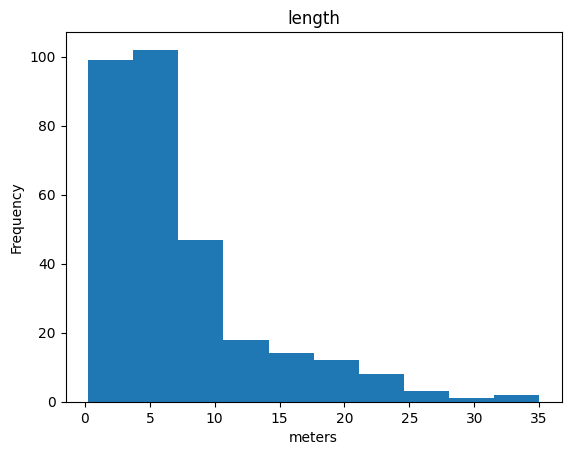

In [75]:
df['length'].plot(kind='hist', title='length', xlabel='meters')

<Axes: >

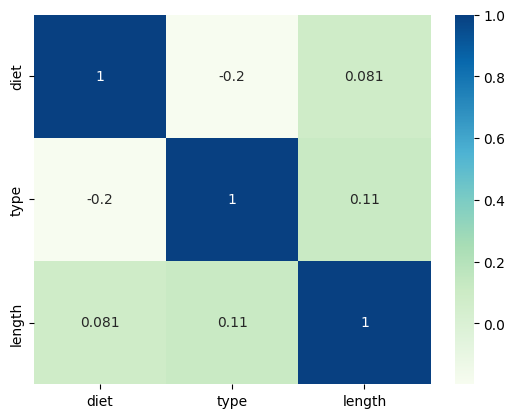

In [76]:
c = df.corr(numeric_only = True)
sns.heatmap(c, cmap = "GnBu", annot = True)

Correlation Matrix

A diagnosis useful in regression. It shows whether independent variables are highly correlated with another. Some models make assumptions that they are NOT. If two indepent variables score high, results in multicollinearity. This can possibly cause problems since each variable does not provide unique information.

Can check for multicollinearity by visually checking with a matrix (like above) or using Variance Inflation Factor (VIF.) First, analyze multicollinearity by first checking severity, then checking features effected to see if it needs to be addressed. Lastly, if used purely for predictive models, multicollinearity will not affect predicive results. If needed to be addressed, you can remove one of the highly correlated values, linearly combine predictor variables, perform analysis like principal component analysis (PCA) or partial least squares (PLS) regression.

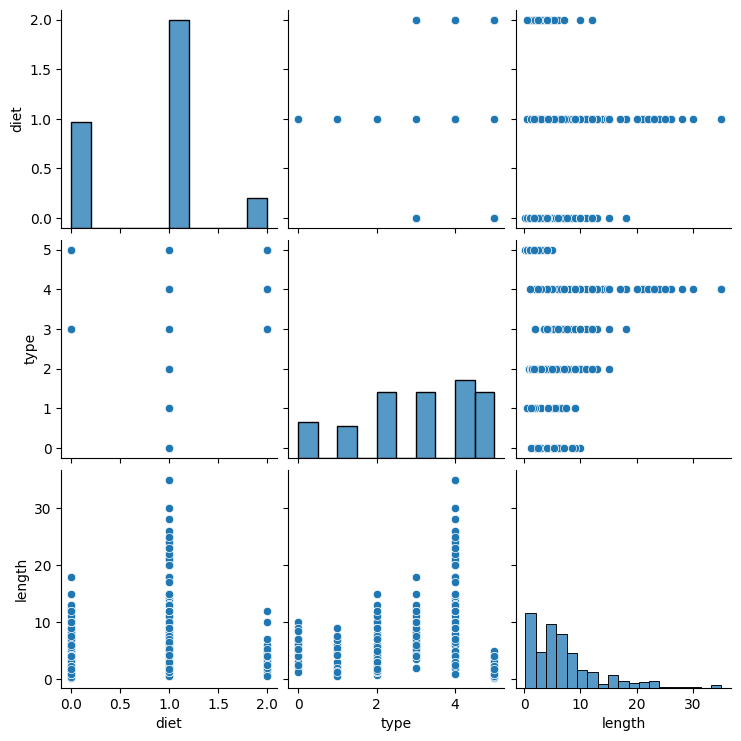

In [77]:
sns.pairplot(df)

Pairplots

go hand in hand with correlation matricies. Visualizes the best set of features to explain a relationship between two variables or to form the most separated clusters. Can also help form some models by showing simple serparation of data points. 